<a href="https://colab.research.google.com/github/Bhargavi592003/-_-/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
dataset = pd.read_csv("/content/Iris.csv")
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.shape

(150, 6)

In [ ]:
dataset.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# Let's check if there in any inconsitency in the data set
dataset = dataset.drop('Id', axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataset["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


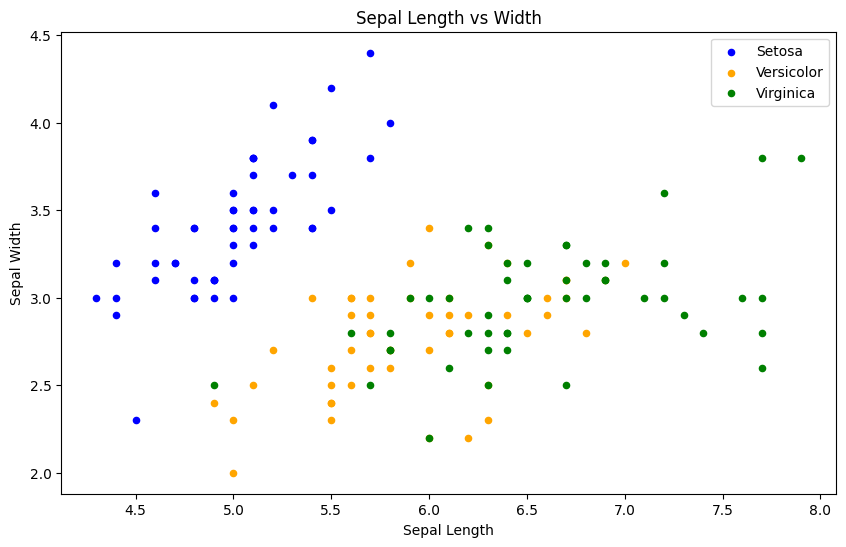

In [ ]:
fig = dataset[dataset.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='Setosa',  figsize= (10,6))
dataset[dataset.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Versicolor',ax=fig)
dataset[dataset.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length vs Width")
plt.show()

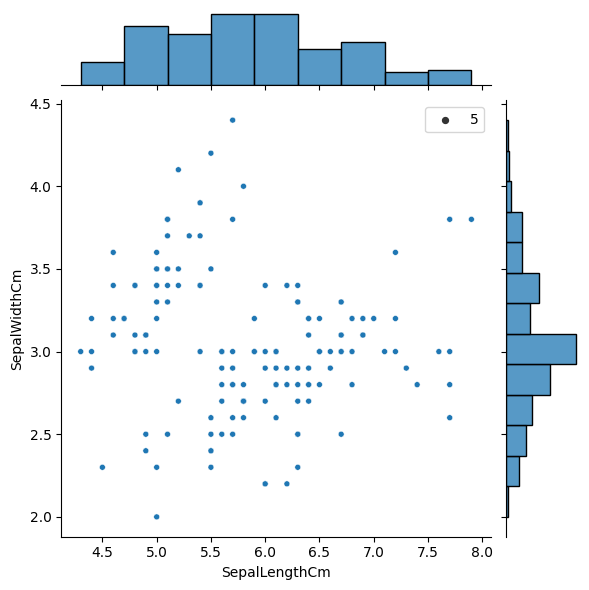

In [ ]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=dataset, size=5)
plt.show()

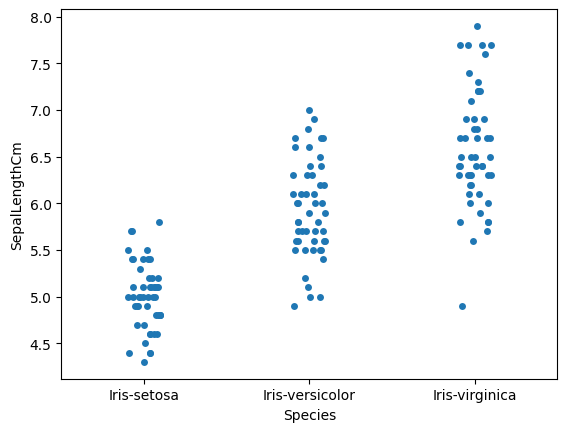

In [ ]:
# Sepal Length using a Strip plot
sns.stripplot(y ='SepalLengthCm', x = 'Species', data =dataset)
plt.show()

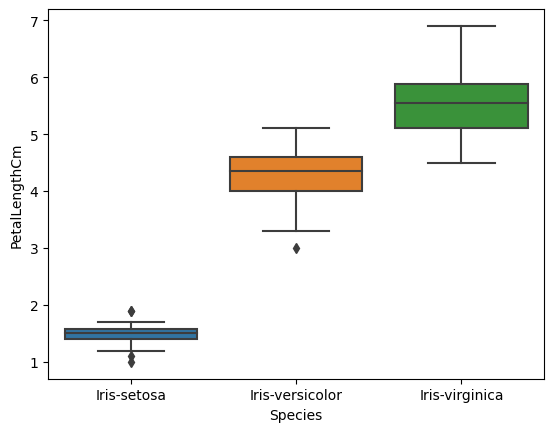

In [ ]:
sns.boxplot(x="Species", y="PetalLengthCm", data=dataset)
plt.show()

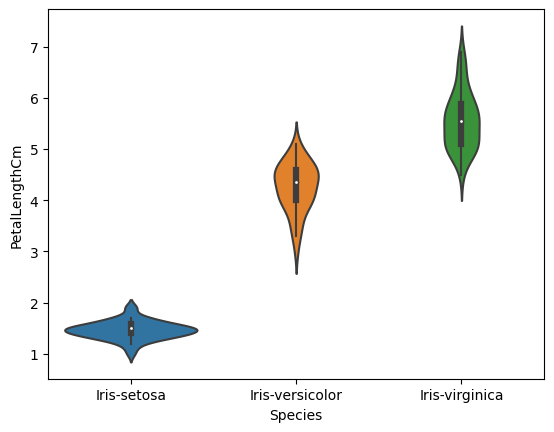

In [ ]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot

sns.violinplot(x="Species", y="PetalLengthCm", data=dataset, size=6)
plt.show()

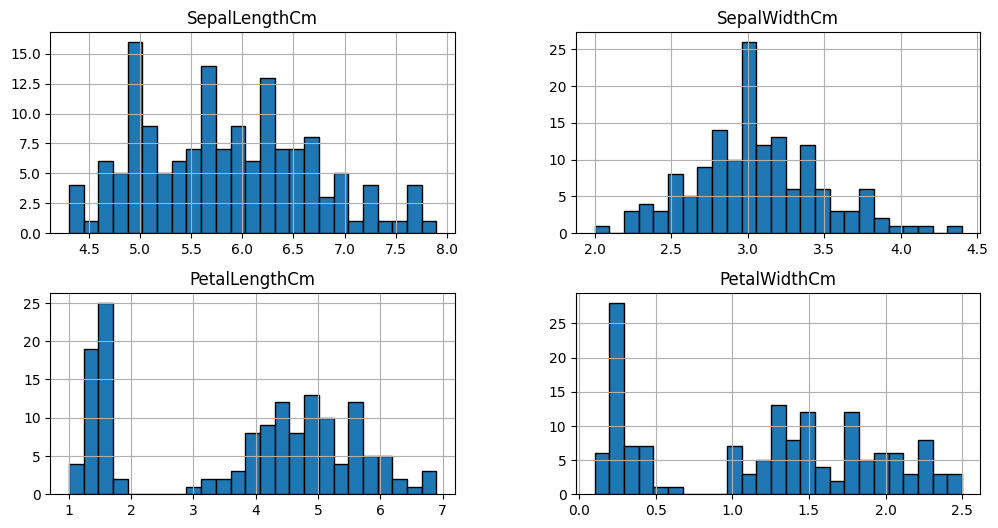

In [ ]:
# Let's see how are the length and width are distributed
dataset.hist(edgecolor='black',bins = 25, figsize= (12,6))
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


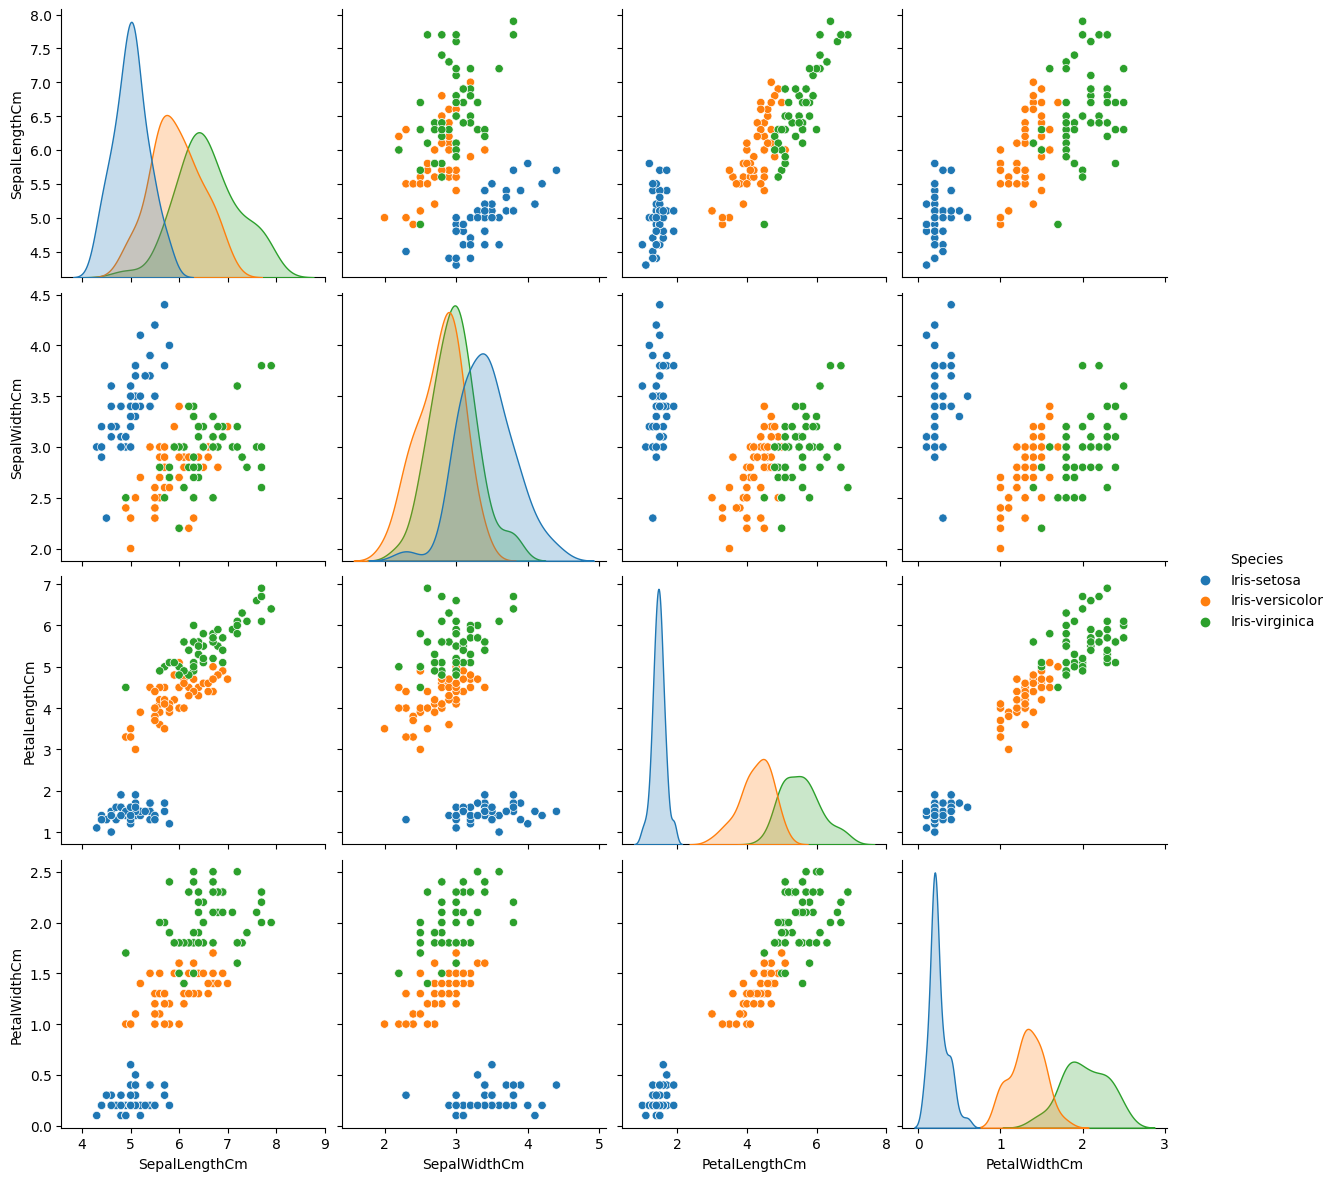

In [17]:

sns.pairplot(data = dataset, hue="Species", size=3)
plt.show()

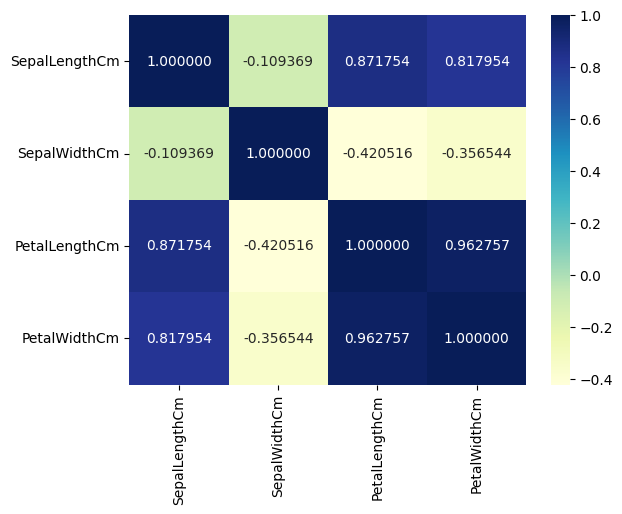

In [18]:
# Plotting heat map
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True, fmt="f")
plt.show()

In [19]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
indices = dataset['Species'] == 'Iris-setosa'
setosa = dataset.loc[indices,:]
indices = dataset['Species'] == 'Iris-versicolor'
versicolor = dataset.loc[indices,:]
indices = dataset['Species'] == 'Iris-virginica'
virginica = dataset.loc[indices,:]

del setosa['Species'], versicolor['Species'], virginica['Species']

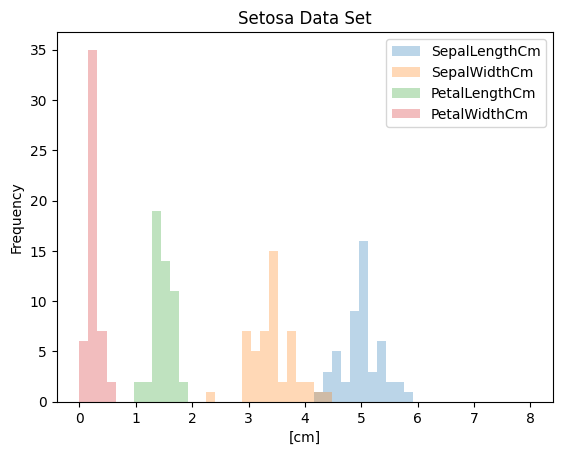

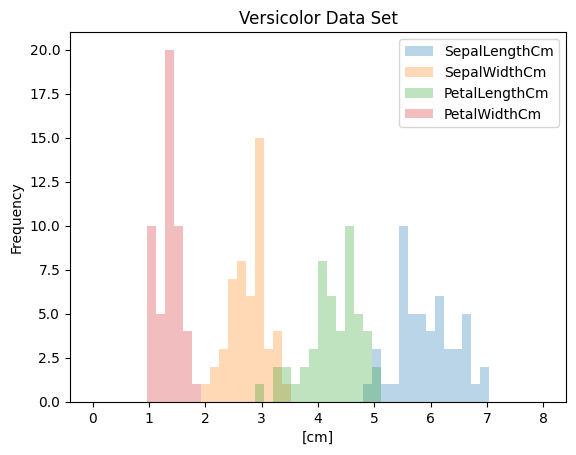

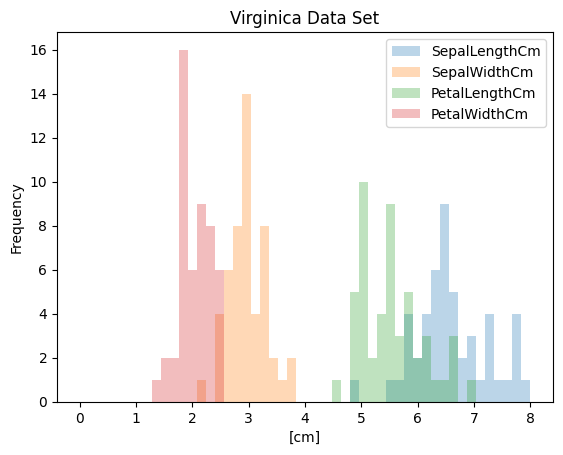

In [24]:
setosa.plot(kind = 'hist', bins =50, range = (0,8), alpha = 0.3)
plt.title('Setosa Data Set')
plt.xlabel('[cm]')

versicolor.plot(kind = 'hist', bins =50, range = (0,8), alpha = 0.3)
plt.title('Versicolor Data Set')
plt.xlabel('[cm]')

virginica.plot(kind = 'hist', bins =50, range = (0,8), alpha = 0.3)
plt.title('Virginica Data Set')
plt.xlabel('[cm]')

plt.show()

In [25]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
dataset.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [34]:
dataset["Species"] = le.fit_transform(dataset["Species"])

In [35]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
x=dataset.iloc[:,0:-1]

In [37]:
y=dataset.iloc[:,-1]

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
predict = model.predict(x_test)

In [43]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predict)
print(mse)

0.0
